# Abstract

Link: https://gym.openai.com/envs/FrozenLake-v0/

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following:

SFFF       (S: starting point, safe) <br>
FHFH      (F: frozen surface, safe) <br>
FFFH       (H: hole, fall to your doom) <br>
HFFG      (G: goal, where the frisbee is located)

## Objective: The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

## About reinforcement learning

*You learn by playing* is the main objctive of reinforcement learning. 
The main components of reinforcement learning are :

1. Agent: Agent is the model that you try to design. Goal is to maximize agent's reward in the env using agent.
2. Environment: Anything that the agent can interact with. Environment changes as actions are performed by agent.
3. State: Every Scenario the agent encounters is a state.  The Agent transitions between different states by performing actions
4. Action: Action is agent's method which allows it to interact and change env, thus, transfer between states.
5. Reward: When the goal is met. It can either be positive or negative. Positive- if the goal is reached. Negative- if the action fails before reaching goal.

Every positive reward is used to build the next one until the goal is reached. Every negative reward is filtered out. 

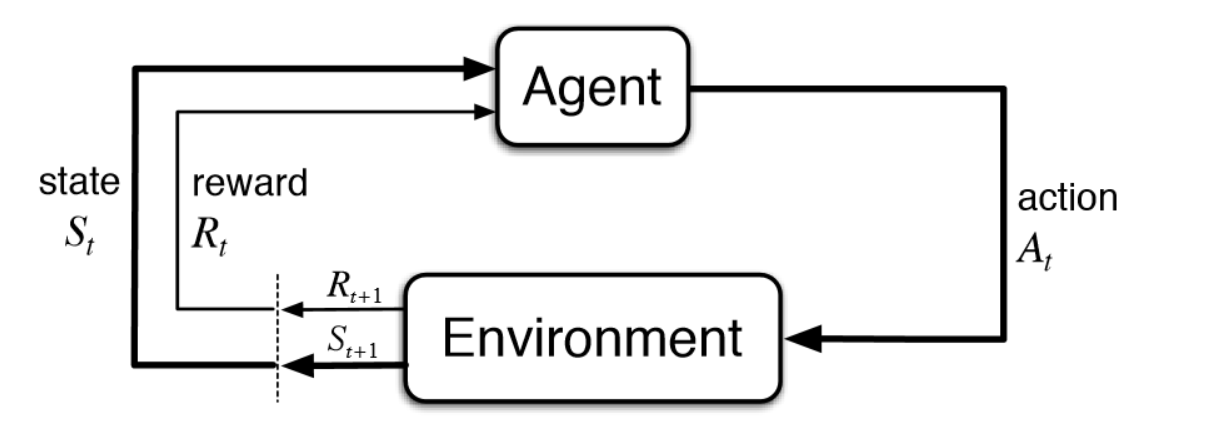

Reward=(Action, State) <br>

$S_{t}$ = State at a given time t=0,1,2,...,n <br>
$A_{t}$ = Action at a given time t=0,1,2,...,n <br>
$R_{t}$ = Reward at a given time t=0,1,2,...,n
<br>

For every iteration, agent receives a reward R.
Agent will learn from environment by interacting with it via action for a particular state and receiving rewards for performing actions given a state.
Goal of agent is to maximize rewards.

### Note
This is just an implementation of the classic “agent-environment loop”. Each timestep, the agent chooses an action, and the environment returns an observation and a reward.



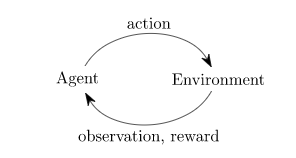

We define a discount rate called gamma. It must be between 0 and 1.
* The larger the gamma, the smaller the discount. This means the learning agent cares more about the long term reward.
* On the other hand, the smaller the gamma, the bigger the discount. This means our agent cares more about the short term reward.

**Discount Factor (γ)** <br>
The discount factor, usually denoted as γ, is a factor multiplying the future expected reward, and varies on the range of [0,1]. It controls the importance of the future rewards versus the immediate ones. The lower the discount factor is, the less important future rewards are, and the Agent will tend to focus on actions which will yield immediate rewards only.

**Episode**  <br>
An episode represents a trial by the agent in its pursuit to reach the goal. 
<br>
An episode ends once the agent reaches a terminal state which in this case is either a hole or the goal.
<br> In general, an episode has **State, Action, Rewards, and New States.** 

Eg: An episode of Super Mario until it hits something or is killed by something.

* **Exploration**: Try all things. Favored when we don't know anything about the env.
* **Exploitation**: Try only things which gives best reward. Favored when we know a lot about the env.
<br>

Exploration/Exploitation trade off: episilon greedy strategy


* If episilion greedy strategy is 1, then explore>exploit.


* If episilon greedy strategy is nearing 0, exploitation is favored.


* If episilion greedy strategy is nearing 1, exploration is favored.

**Continuous tasks**
These are tasks that continue forever (no terminal state). In this case, the agent has to learn how to choose the best actions and simultaneously interacts with the environment.

For instance, an agent that do automated stock trading. For this task, there is no starting point and terminal state. The agent keeps running until we decide to stop him.



#### Monte Carlo vs TD Learning methods
We have two ways of learning:

* Collecting the rewards at the end of the episode and then calculating the maximum expected future reward: Monte Carlo Approach
* Estimate the rewards at each step: Temporal Difference Learning

### Three ways to do Reinforcement learning:
1. Value function based: The value function is a function that tells us the maximum expected future reward the agent will get at each state. 
2. Policy based: The policy is what defines the agent behavior at a given time.We optimize policy
    * Deterministic: a policy at a given state will always return the same action.
    * Stochastic: output a distribution probability over actions.
3. Model based

###  Q-Learning is a value-based Reinforcement Learning algorithm. Q is quality of action. Woah! :o

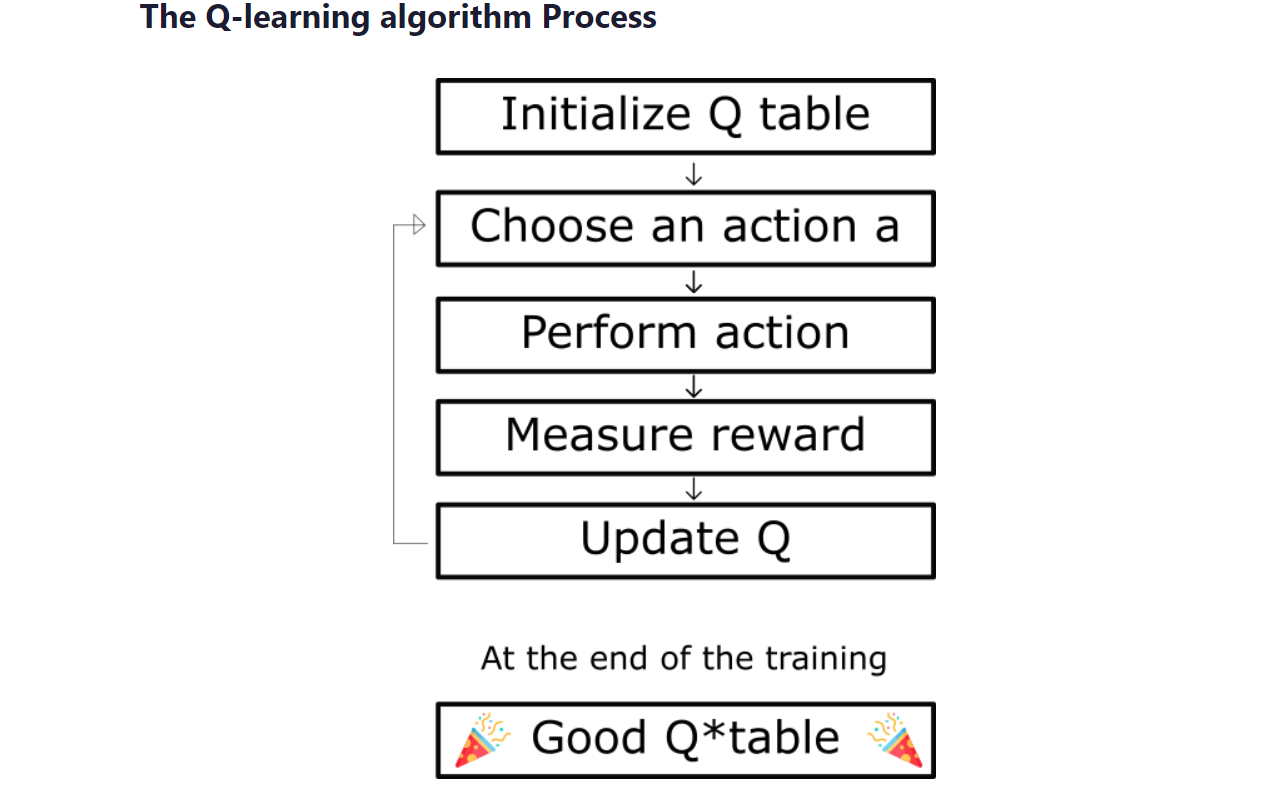

### Update Q-Value using the Bellman Equation

New Q value =    Current Q value +    lr * [Reward + discount_rate * (highest Q value between possible actions from the new state s’ ) — Current Q value ]


## Main objective of ForzenLake using Reinforcement Learning

* Actions: $\mathcal{A} = \{0, 1, 2, 3\}$
* LEFT: 0
* DOWN = 1
* RIGHT = 2
* UP = 3
* Whole lake is a 4 x 4 grid world, $\mathcal{S} = \{0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15\}$


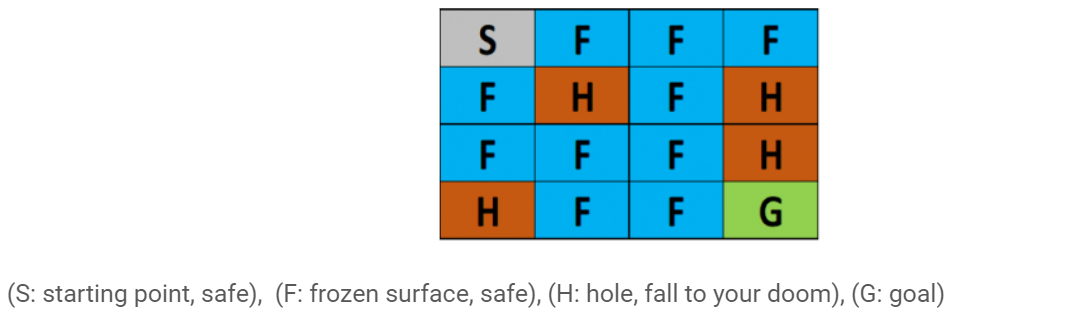

### Start from S and Reach G using the most optimal path.

#### Let's get started !!!

In [1]:
import gym
import numpy as np
import random
from IPython import display
import time
from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196, # optimum = .8196, changing this seems have no influence
)

In [3]:
env = gym.make("FrozenLakeNotSlippery-v0")

In [4]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [5]:

def qlearningTrial(epsilon, total_episodes, learning_rate, max_steps, gamma):

    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):
            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0, 1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            # qtable[new_state,:] : all the actions we can take from new state
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards =total_rewards + reward

            # Our new state is state
            state = new_state

            # If done (if we're dead) : finish episode
            if done == True: 
                break

        episode += 1
        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
        rewards.append(total_rewards)

    print("For total episodes of  ", total_episodes, " where learning rate is  ", learning_rate, "and discount rate is  ", gamma)
    print ("Score over time: " +  str(sum(rewards)/total_episodes))
    print("New Q-table \n",qtable)
    print("Epsilon is  ",epsilon)
#     return qtable

In [10]:
def testFrozenLake(total_test_episodes, max_steps, qtable):
    win=0
    steps=0
    print('**** New Q table**** \n', qtable)
    for the_episode in range(total_test_episodes):
        game_state = env.reset()
        game_finished = False
        epoch=0
        print("*******EPISODE  ", the_episode+1, "*********\n\n\n\n")
    #     time.sleep(2)

        for step in range(max_steps):
            clear_output(wait=True)
    #         env.render()
    #         time.sleep(0.6)

            game_action = np.argmax(qtable[game_state,:])
            game_new_state, game_reward, done, game_info = env.step(game_action)

            if done:
                clear_output(wait = True)
    #             env.render()
                if game_reward == 1:
                    win += 1
                    print("*****WOW!: You reached the goal!******", " in ", step, "steps")
    #                 time.sleep(3.1)
                else:
                    print("*****LOST: You fell through a hole******")
    #                 time.sleep(3.1)
                clear_output(wait=True)
                break
                steps+=1

            game_state = game_new_state

    env.close()
    print("Number of of episodes ", total_test_episodes)
    print("Number of Wins: ", win)
    print("Number of Failures: ", (total_test_episodes-win))
    print("Testing accuracy: ", ((win/total_test_episodes)*100), "%")
    print ("Average timestep per episode: " +  str(steps/total_test_episodes))


In [6]:
total_episodes = 5000        # Total episodes
learning_rate = 0.7           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.8                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob
#I find that decay_rate=0.001 works much better than 0.01

qtable = np.zeros((state_size, action_size))
print("Initial Q-table \n")
rewards = []

#Baseline
print("Baseline model for Frozen Lake")
qlearningTrial(epsilon, total_episodes, learning_rate, max_steps, gamma)

Initial Q-table 

Baseline model for Frozen Lake
For total episodes of   5000  where learning rate is   0.7 and discount rate is   0.8
Score over time: 0.0
New Q-table 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Epsilon is   0.01


In [7]:
## Test game

win=0
num_episd = 100
r2=[]
for the_episode in range(100):
    game_state = env.reset()
    game_finished = False
    r1=0
    print("*******EPISODE  ", the_episode+1, "*********\n\n\n\n")
#     time.sleep(2)
    
    for step in range(max_steps):
        clear_output(wait=True)
#         env.render()
#         time.sleep(0.6)
        
        game_action = np.argmax(qtable[game_state,:])
        game_new_state, game_reward, game_finished, game_info = env.step(game_action)
        
        if game_finished:
            clear_output(wait = True)
            if game_reward == 1:
                win += 1
                r1+= game_reward
                print("*****WOW!: You reached the goal!******")
            else:
                print("*****LOST: You fell through a hole******")
            clear_output(wait=True)
            r2.append(r1)
            break
        
        game_state = game_new_state
    
env.close()
print("Number of of Trials: %d\n" %num_episd)
print("Number of Successes: %d\n" %win)
print("Number of Failures: %d\n" %(num_episd-win))
print("Testing accuracy: %2.2f" %((win/num_episd)*100), "%")
print("Reward: ", sum(r2))

Number of of Trials: 100

Number of Successes: 0

Number of Failures: 100

Testing accuracy: 0.00 %
Reward:  0


In [8]:
## Reset q-table and rewards when experiminting with 
qtable = np.zeros((state_size, action_size))
rewards = []

# Hyperparameter tuning
total_episodes, learning_rate, max_steps, gamma = 20000, 0.7, 99, 0.8

# Exploration parameters
epsilon, max_epsilon, min_epsilon, decay_rate = 1.0, 1.0, 0.01, 0.01

print("Hyperparameter tuned Q-learning Frozen Lake: ")
qlearningTrial(epsilon, total_episodes, learning_rate, max_steps, gamma)

Hyperparameter tuned Q-learning Frozen Lake: 
For total episodes of   20000  where learning rate is   0.7 and discount rate is   0.8
Score over time: 0.0
New Q-table 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Epsilon is   0.01


In [15]:
## Reset q-table and rewards when experiminting with 
qtable = np.zeros((state_size, action_size))
print(qtable)
rewards = []

# Hyperparameter tuning
total_episodes, learning_rate, max_steps, gamma = 30000, 0.1, 99, 0.5

# Exploration parameters
epsilon, max_epsilon, min_epsilon, decay_rate = 1.0, 1.0, 0.01, 0.01

print("Hyperparameter tuned Q-learning Frozen Lake: ")
qlearningTrial(epsilon, total_episodes, learning_rate, max_steps, gamma)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Hyperparameter tuned Q-learning Frozen Lake: 
For total episodes of   30000  where learning rate is   0.1 and discount rate is   0.5
Score over time: 0.0
New Q-table 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Epsilon is   0.01


In [16]:
## Reset q-table and rewards when experiminting with 
qtable = np.zeros((state_size, action_size))
print(qtable)
rewards = []

# Hyperparameter tuning
total_episodes, learning_rate, max_steps, gamma = 40000, 0.4, 99, 0.5

# Exploration parameters
epsilon, max_epsilon, min_epsilon, decay_rate = 1.0, 1.0, 0.01, 0.001

print("Hyperparameter tuned Q-learning Frozen Lake: ")
qlearningTrial(epsilon, total_episodes, learning_rate, max_steps, gamma)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Hyperparameter tuned Q-learning Frozen Lake: 
For total episodes of   40000  where learning rate is   0.4 and discount rate is   0.5
Score over time: 0.961825
New Q-table 
 [[0.015625   0.03125    0.03125    0.015625  ]
 [0.015625   0.         0.0625     0.03125   ]
 [0.03125    0.125      0.03125    0.0625    ]
 [0.0625     0.         0.03124998 0.03124998]
 [0.03125    0.0625     0.         0.015625  ]
 [0.         0.         0.         0.        ]
 [0.         0.25       0.         0.0625    ]
 [0.         0.         0.         0.        ]
 [0.0625     0.         0.125      0.03125   ]
 [0.0625     0.25       0.25       0.        ]
 [0.125      0.5        0.         0.125     ]
 [0.         0.         0.         0.        ]
 [0.         0.       

In [22]:
def testFrozenLake(total_test_episodes, max_steps, qtable):
    win=0
    steps=0
    print('**** New Q table**** \n', qtable)
    for the_episode in range(total_test_episodes):
        game_state = env.reset()
        game_finished = False
        epoch=0
        print("*******EPISODE  ", the_episode+1, "*********\n\n\n\n")
    #     time.sleep(2)

        for step in range(max_steps):
            clear_output(wait=True)
    #         env.render()
    #         time.sleep(0.6)

            game_action = np.argmax(qtable[game_state,:])
            game_new_state, game_reward, done, game_info = env.step(game_action)

            if done:
                clear_output(wait = True)
    #             env.render()
                if game_reward == 1:
                    win += 1
                    print("*****WOW!: You reached the goal!******", " in ", step, "steps")
    #                 time.sleep(3.1)
                else:
                    print("*****LOST: You fell through a hole******")
    #                 time.sleep(3.1)
                clear_output(wait=True)
                break
                steps+=1

            game_state = game_new_state

    env.close()
    print("Number of of episodes ", total_test_episodes)
    print("Number of Wins: ", win)
    print("Number of Failures: ", (total_test_episodes-win))
    print("Testing accuracy: ", ((win/total_test_episodes)*100), "%")
    print ("Average timestep per episode: " +  str(steps/total_test_episodes))


In [20]:
## Reset q-table and rewards when experiminting with 
qtable = np.zeros((state_size, action_size))
print(qtable)
rewards = []

# Hyperparameter tuning
total_episodes, learning_rate, max_steps, gamma = 50000, 0.4, 99, 0.5

# Exploration parameters
epsilon, max_epsilon, min_epsilon, decay_rate = 1.0, 1.0, 0.01, 0.001

print("Hyperparameter tuned Q-learning Frozen Lake: ")
qlearningTrial(epsilon, total_episodes, learning_rate, max_steps, gamma)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Hyperparameter tuned Q-learning Frozen Lake: 
For total episodes of   50000  where learning rate is   0.4 and discount rate is   0.5
Score over time: 0.96754
New Q-table 
 [[0.015625   0.03125    0.03125    0.015625  ]
 [0.015625   0.         0.0625     0.03125   ]
 [0.03125    0.125      0.03124981 0.06249975]
 [0.06249994 0.         0.03065868 0.03070282]
 [0.03125    0.0625     0.         0.015625  ]
 [0.         0.         0.         0.        ]
 [0.         0.25       0.         0.06249507]
 [0.         0.         0.         0.        ]
 [0.0625     0.         0.125      0.03125   ]
 [0.0625     0.25       0.25       0.        ]
 [0.125      0.5        0.         0.125     ]
 [0.         0.         0.         0.        ]
 [0.         0.        

In [24]:
total_test_episodes=100
testFrozenLake(total_test_episodes, max_steps, qtable)

Number of of episodes  100
Number of Wins:  100
Number of Failures:  0
Testing accuracy:  100.0 %
Average timestep per episode: 0.0


**Main hyperparameters to look out for**

* α: (the learning rate) should decrease as you continue to gain a larger and larger knowledge base.

* γ: as you get closer and closer to the deadline, your preference for near-term reward should increase, as you won't be around long enough to get the long-term reward, which means your gamma should decrease.

* ϵ: as we develop our strategy, we have less need of exploration and more exploitation to get more utility from our policy, so as trials increase, epsilon should decrease.


## Part-1

## Establish a baseline performance. How well did your RL Q-learning do on your problem?

Reward was zero for baseline performance. Failures at an all time high (all episodes fail) 

## What are the states, the actions and the size of the Q-table?

print("States : ", state_size, "\n", "Actions: ", action_size, "\n", "Size of Q-table: ", state_size * action_size)

## What are the rewards? Why did you choose them?

Reward: 1.0 if it reached the goal.
Reward: 0.0 if it falls in the hole.
 Default

## How did you choose alpha and gamma in the following equation? 
 


## Try at least one additional value for alpha and gamma. How did it change the baseline performance?

* α: (the learning rate) should decrease as you continue to gain a larger and larger knowledge base.
* γ: as you get closer and closer to the deadline, your preference for near-term reward should increase, as you won't be around long enough to get the long-term reward, which means your gamma should decrease.  long term (γ close to 1) or short term (γ close to 0).

* When alpha changed from 0.7 to 0.4, reward changed from 0 to 0.96
* When gamma changed from 0.8 to 0.6 reward changed from 0 to 0.96*


## Try a policy other than maxQ(s', a'). How did it change the baseline performance? 


In [26]:
def qlearningTrialMin(epsilon, total_episodes, learning_rate, max_steps, gamma):

    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):
            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0, 1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmin(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            # qtable[new_state,:] : all the actions we can take from new state
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards =total_rewards + reward

            # Our new state is state
            state = new_state

            # If done (if we're dead) : finish episode
            if done == True: 
                break

        episode += 1
        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
        rewards.append(total_rewards)

    print("For total episodes of  ", total_episodes, " where learning rate is  ", learning_rate, "and discount rate is  ", gamma)
    print("Epsilon is  ",epsilon)
    print ("For argmin Score over time: " +  str(sum(rewards)/total_episodes))
    print("New Q-table \n",qtable)

In [27]:
def testFrozenLakeMin(total_test_episodes, max_steps, qtable):
    win=0
    for the_episode in range(total_test_episodes):
        game_state = env.reset()
        game_finished = False
        print("*******EPISODE  ", the_episode+1, "*********\n\n\n\n")
    #     time.sleep(2)

        for step in range(max_steps):
            clear_output(wait=True)
    #         env.render()
    #         time.sleep(0.6)

            game_action = np.argmin(qtable[game_state,:])
            game_new_state, game_reward, done, game_info = env.step(game_action)

            if done:
                clear_output(wait = True)
    #             env.render()
                if game_reward == 1:
                    win += 1
                    print("*****WOW!: You reached the goal!******")
    #                 time.sleep(3.1)
                else:
                    print("*****LOST: You fell through a hole******")
    #                 time.sleep(3.1)
                clear_output(wait=True)
                break

            game_state = game_new_state

    env.close()
    print("Number of of e:pisodes ", total_test_episodes)
    print("Number of Wins: ", win)
    print("Number of Failures: ", (total_test_episodes-win))
    print("Testing accuracy: ", ((win/total_test_episodes)*100), "%")

In [29]:
total_episodes = 50000        # Total episodes
total_test_episodes= 100
max_steps = 99                # Max steps per episode
learning_rate = 0.7           # Learning rate
gamma = 0.8                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob
#I find that decay_rate=0.001 works much better than 0.01

qtable = np.zeros((state_size, action_size))
print("Initial Q-table \n")
rewards = []

#Baseline Learn
print("Baseline model for Frozen Lake")
qlearningTrialMin(epsilon, total_episodes, learning_rate, max_steps, gamma)

Initial Q-table 

Baseline model for Frozen Lake
For total episodes of   50000  where learning rate is   0.7 and discount rate is   0.8
Epsilon is   0.01
For argmin Score over time: 0.0
New Q-table 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [32]:
## Baseline Play
testFrozenLakeMin(total_test_episodes, max_steps, qtable)

Number of of e:pisodes  100
Number of Wins:  0
Number of Failures:  100
Testing accuracy:  0.0 %


## How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode?

Used default decay rate and highest value for epsilon. The reason for choosing highest value (1.0) for epsilon was that we want to explore more in the beginning and then exploit. 

In [33]:
total_episodes = 50000        # Total episodes
total_test_episodes= 100
max_steps = 99                # Max steps per episode
learning_rate = 0.7           # Learning rate
gamma = 0.8                  # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 

##Changing decay rate
decay_rate = 0.001             # Exponential decay rate for exploration prob
#I find that decay_rate=0.001 works much better than 0.01

##Changing epsilon rate
epsilon = 0.6                 # Exploration rate

qtable = np.zeros((state_size, action_size))
print("Initial Q-table \n")
rewards = []

#Baseline Learn
print("Baseline model for Frozen Lake")
qlearningTrial(epsilon, total_episodes, learning_rate, max_steps, gamma)

Initial Q-table 

Baseline model for Frozen Lake
For total episodes of   50000  where learning rate is   0.7 and discount rate is   0.8
Score over time: 0.96798
New Q-table 
 [[0.262144 0.32768  0.32768  0.262144]
 [0.262144 0.       0.4096   0.32768 ]
 [0.32768  0.512    0.32768  0.4096  ]
 [0.4096   0.       0.32768  0.32768 ]
 [0.32768  0.4096   0.       0.262144]
 [0.       0.       0.       0.      ]
 [0.       0.64     0.       0.4096  ]
 [0.       0.       0.       0.      ]
 [0.4096   0.       0.512    0.32768 ]
 [0.4096   0.64     0.64     0.      ]
 [0.512    0.8      0.       0.512   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.64     0.8      0.512   ]
 [0.64     0.8      1.       0.64    ]
 [0.       0.       0.       0.      ]]
Epsilon is   0.01


In [34]:
##Baseline play
testFrozenLake(total_test_episodes, max_steps, qtable)

Number of of episodes  100
Number of Wins:  100
Number of Failures:  0
Testing accuracy:  100.0 %
Average timestep per episode: 0.0


## What is the average number of steps taken per episode?

5.0

## Does Q-learning use value-based or policy-based iteration?

Q-learning is a value-based Reinforcement Learning algorithm that is used to find the optimal action-selection policy using a q function.

## What is meant by expected lifetime value in the Bellman equation?

In [36]:
qtable

array([[0.262144, 0.32768 , 0.32768 , 0.262144],
       [0.262144, 0.      , 0.4096  , 0.32768 ],
       [0.32768 , 0.512   , 0.32768 , 0.4096  ],
       [0.4096  , 0.      , 0.32768 , 0.32768 ],
       [0.32768 , 0.4096  , 0.      , 0.262144],
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.64    , 0.      , 0.4096  ],
       [0.      , 0.      , 0.      , 0.      ],
       [0.4096  , 0.      , 0.512   , 0.32768 ],
       [0.4096  , 0.64    , 0.64    , 0.      ],
       [0.512   , 0.8     , 0.      , 0.512   ],
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.64    , 0.8     , 0.512   ],
       [0.64    , 0.8     , 1.      , 0.64    ],
       [0.      , 0.      , 0.      , 0.      ]])

# Conclusion

By increasing number of episodes and decreasing learning rate, discount rate, and epsilon we are able to see that as the game is learning with more episodes it is learning to exploit than explore. Thus, giving a reward of 96%

# Citations

* https://www.freecodecamp.org/news/diving-deeper-into-reinforcement-learning-with-q-learning-c18d0db58efe/
* https://www.freecodecamp.org/news/an-introduction-to-reinforcement-learning-4339519de419/
* https://towardsdatascience.com/the-complete-reinforcement-learning-dictionary-e16230b7d24e
* https://towardsdatascience.com/qrash-course-deep-q-networks-from-the-ground-up-1bbda41d3677
* https://github.com/ritchieng/deep-learning-wizard/blob/master/docs/deep_learning/deep_reinforcement_learning_pytorch/dynamic_programming_frozenlake.ipynb
* https://towardsdatascience.com/my-journey-to-reinforcement-learning-part-1-q-learning-with-table-35540020bcf9
*  https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/FrozenLake/Q%20Learning%20with%20FrozenLake.ipynb

# Contributions

By own: 45%
External resource: 55%

# The MIT License


Copyright (c)  2020 Seemanthini Jois

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.